# Comparison of Different Models on House Price Prediction

## Import Library

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import seaborn as sns
import os
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Load Dataset

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

print("The train data size:{}".format(train_data.shape))
print("The test data size:{}".format(test_data.shape))
train_data.head()


The train data size:(1460, 81)
The test data size:(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Figure out different futures

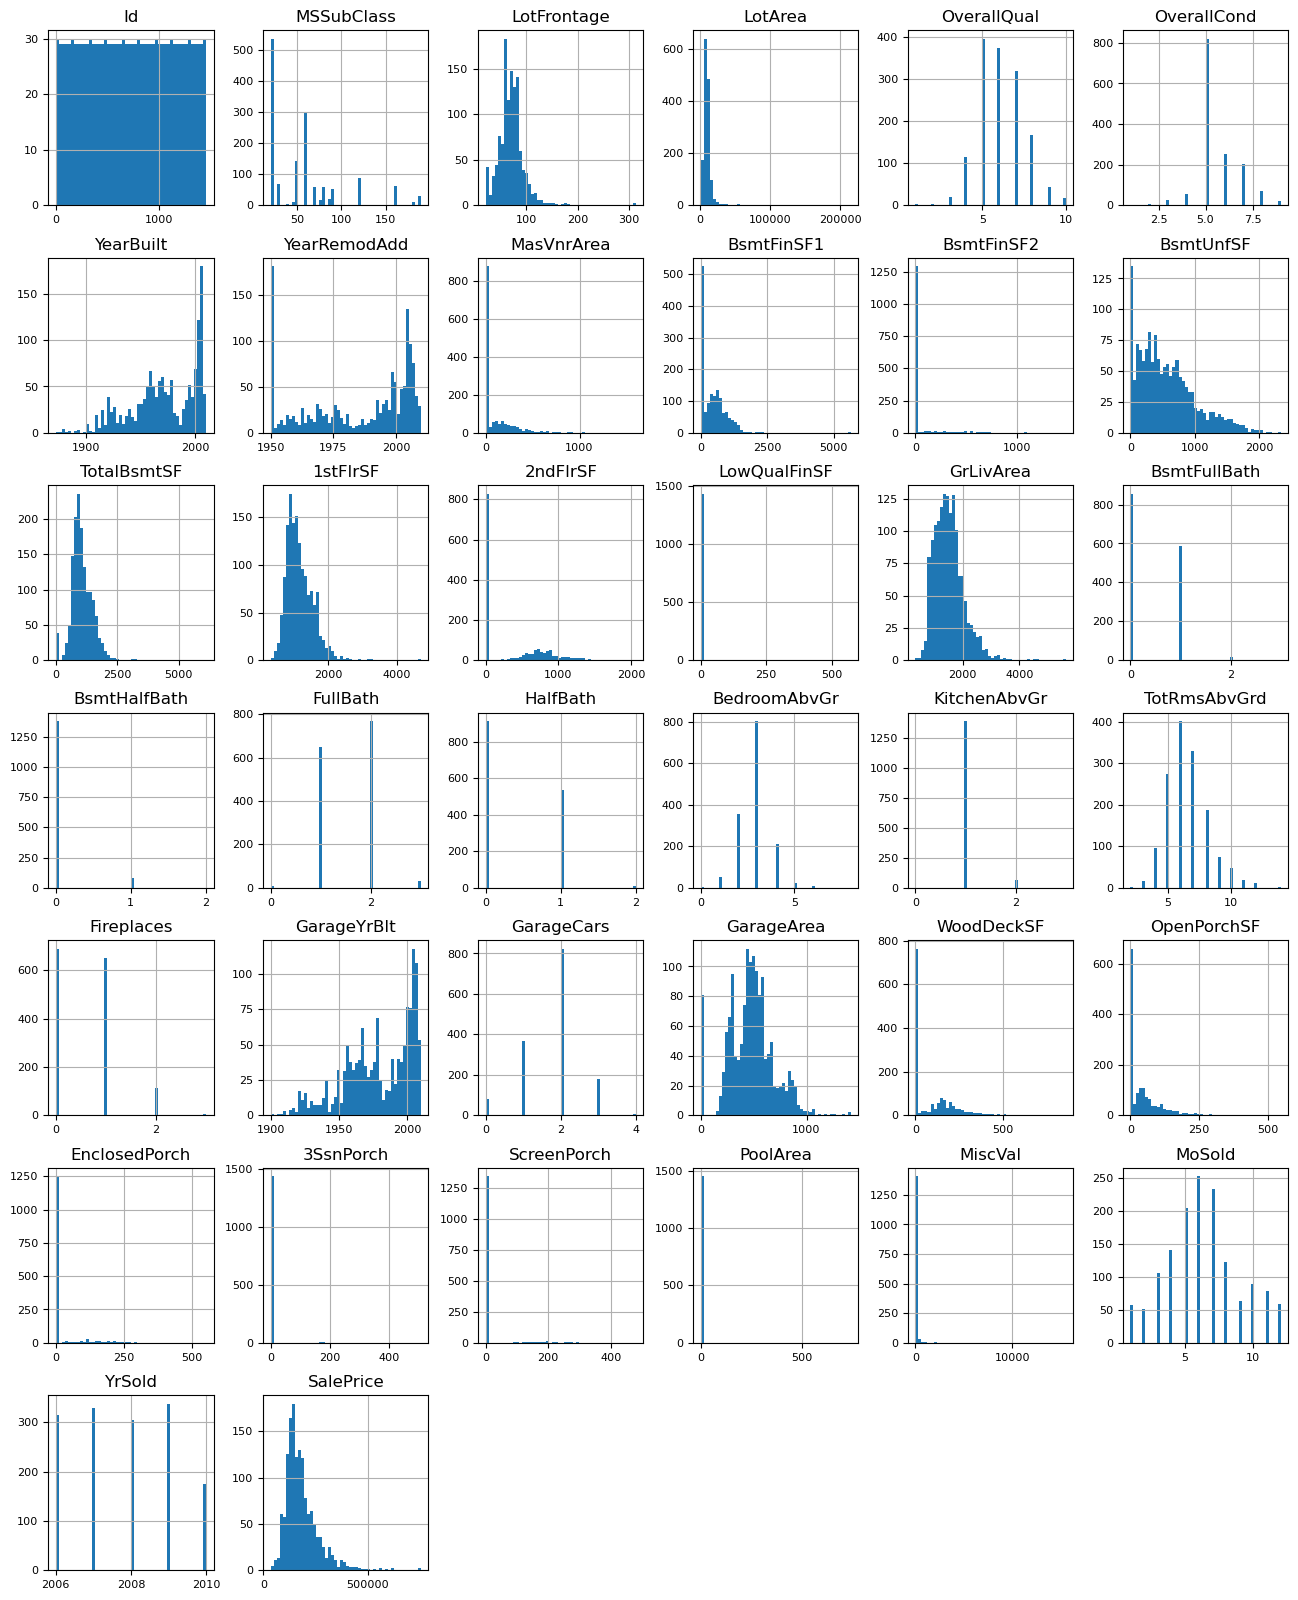

In [4]:
data_num = train_data.select_dtypes(include = ['float64', 'int64'])
data_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

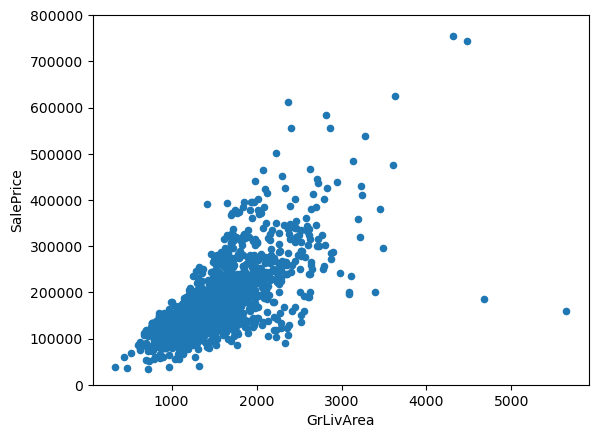

In [5]:
var='GrLivArea' # living area
data=pd.concat([train_data['SalePrice'],train_data[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
plt.show()

### Take a special look at house prices

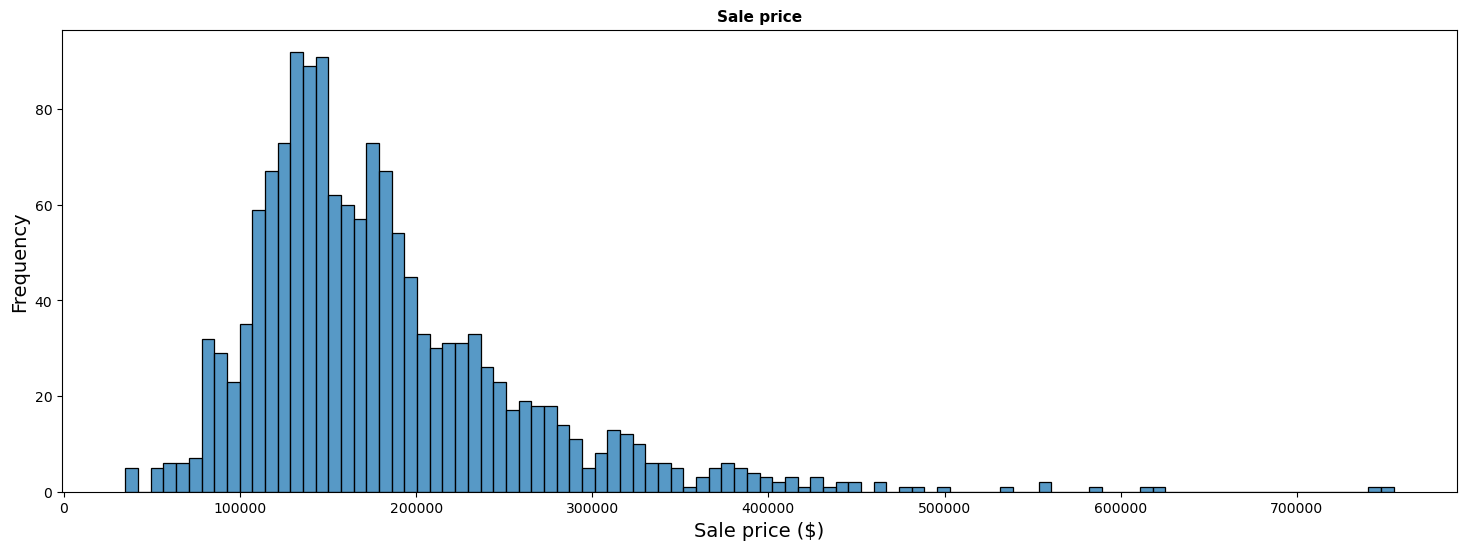

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [6]:
# Create figure 
plt.figure(figsize=(18, 6))                                                                  
# Creating Histogram Plot 
sns.histplot(train_data['SalePrice'], bins=100)                                                   
plt.xlabel('Sale price ($)', fontsize=14)                                                   
plt.ylabel('Frequency', fontsize=14)                                                           
plt.title('Sale price', fontdict={'fontsize': 11, 'fontweight': 'bold'})                  

plt.show();                                                                                     

print(train_data['SalePrice'].describe())

## Missing data

In [7]:
train_data = train_data.drop(train_data[(train_data['GrLivArea'] > 4000) & (train_data['SalePrice'] < 300000)].index)
train_data = train_data.drop(train_data[(train_data['TotalBsmtSF'] > 4000) & (train_data['SalePrice'] < 300000)].index)
train_data.drop('Id',axis=1,inplace=True)
test_data.drop('Id',axis=1,inplace=True)
ntrain = train_data.shape[0]
ntest = test_data.shape[0]
y_train = train_data['SalePrice']
y_train = train_data.SalePrice.values
all_set = pd.concat([train_data,test_data], ignore_index=True)
missing_data = all_set.isnull().sum().sort_values(ascending = False)
missing_precent = ((all_set.isnull().sum())/(all_set.isnull().count())).sort_values(ascending=False)
missing_type = all_set.dtypes
missing_all = pd.concat([missing_data,missing_precent,missing_type],axis=1,keys=['missing_data','missing_precent','missing_type'])
missing_all.drop(missing_all[missing_data==0].index,inplace=True)
missing_all.sort_values(by='missing_data',ascending=False)

,missing_data,missing_precent,missing_type
PoolQC,2908,0.996915,object
MiscFeature,2812,0.964004,object
Alley,2719,0.932122,object
Fence,2346,0.804251,object
MasVnrType,1766,0.605417,object
SalePrice,1459,0.500171,float64
FireplaceQu,1420,0.486802,object
LotFrontage,486,0.166610,float64
GarageCond,159,0.054508,object
GarageYrBlt,159,0.054508,float64


### Drop out those features that have more than 15 missing percents

In [8]:
all_set.drop(missing_all[missing_data>4].index,axis=1,inplace=True)

C:\Users\wangshy\AppData\Local\Temp\ipykernel_81096\25895223.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_set.drop(missing_all[missing_data>4].index,axis=1,inplace=True)


### Check out the other features

In [9]:
aa = all_set.isnull().sum()
aa[aa>0].sort_values(ascending=False)

MSZoning        4
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
Functional      2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
Electrical      1
KitchenQual     1
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

In [10]:
# Garage
for col in ('GarageCars','GarageArea'):
    all_set[col]=all_set[col].fillna(0)
# Baseroom
for col in ('BsmtFinSF2','BsmtFinSF1','TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath'):
    all_set[col]=all_set[col].fillna(0)
# Kitchen quality
all_set['KitchenQual']=all_set['KitchenQual'].fillna(all_set['KitchenQual'].mode()[0])
# Electrical system
all_set['Electrical']=all_set['Electrical'].fillna(all_set['Electrical'].mode()[0])
# Exterior covering on house
all_set['Exterior2nd']=all_set['Exterior2nd'].fillna(all_set['Exterior2nd'].mode()[0])
all_set['Exterior1st']=all_set['Exterior1st'].fillna(all_set['Exterior1st'].mode()[0])
# Type of sale
all_set['SaleType']=all_set['SaleType'].fillna(all_set['SaleType'].mode()[0])
# The general zoning classification
all_set['MSZoning']=all_set['MSZoning'].fillna(all_set['MSZoning'].mode()[0])
# Type of utilities available
all_set=all_set.drop(['Utilities'],axis=1)
# Home functionality rating
all_set['Functional']=all_set['Functional'].fillna('Typ') 
aa = all_set.isnull().sum()
aa[aa>0].sort_values(ascending=False)

Series([], dtype: int64)

In [11]:
all_set['MSSubClass']=all_set['MSSubClass'].apply(str)
all_set['OverallCond']=all_set['OverallCond'].astype(str)
all_set['MoSold']=all_set['MoSold'].astype(str)
all_set['YrSold']=all_set['YrSold'].astype(str)
from sklearn.preprocessing import LabelEncoder
cols =['BldgType','CentralAir','Condition1','Condition2','Electrical','ExterCond','ExterQual','Exterior1st','Exterior2nd','Foundation','Heating','HeatingQC','HouseStyle','KitchenQual','LandContour','LandSlope','LotConfig','LotShape','Neighborhood','PavedDrive','RoofMatl','PavedDrive','RoofStyle','SaleCondition','SaleType','Street']
le=LabelEncoder()
for i in cols:
    all_set[i]=le.fit_transform(list(all_set[i].values))
all_set['TotalSF'] = all_set['TotalBsmtSF'] + all_set['1stFlrSF'] + all_set['2ndFlrSF']

### One-Hot

In [12]:
all_set = pd.get_dummies(all_set)

train = all_set[:ntrain]
test = all_set[ntrain:]

print("The processed train data size: {}".format(train.shape))
print("The processed test data size: {}".format(test.shape))

The processed train data size: (1458, 109)
The processed test data size: (1459, 109)


In [13]:
all_set.shape

(2917, 109)

## Build models

### Import Library

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

### RMSE(Root Mean Squared Error)

In [15]:
def rmse(x,y):
    mse = mean_squared_error(x, y)
    rmse = np.sqrt(mse)
    return rmse

### Find the best test size

In [16]:
X = train
y = train_data['SalePrice']
def find_test_size(size):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = size, random_state=42)
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    numeric_transformer = StandardScaler()
    categorical_features = X.select_dtypes(include=['object']).columns
    categorical_transformer = OneHotEncoder(drop='first')
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])
    pipeline_lr.fit(X_train, y_train)
    y_pred_lr = pipeline_lr.predict(X_val)
    score = rmse(y_val, y_pred_lr)
    return score

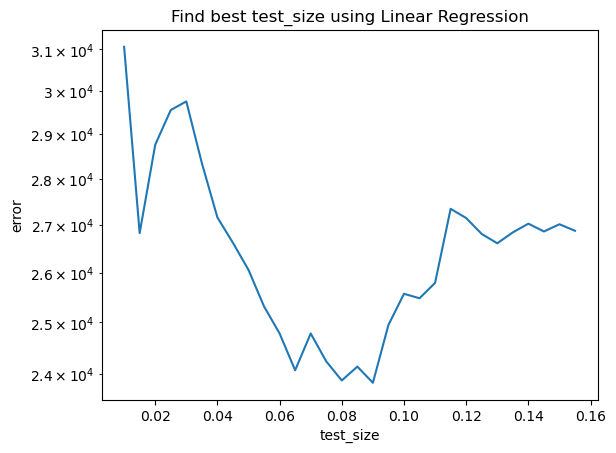

In [17]:
x_test = []
y_test = []
for i in range(30):
    x_test.append(0.005*i+0.01)
    find_y = find_test_size(0.005*i+0.01)
    y_test.append(find_y)
plt.semilogy(x_test, y_test)
plt.xlabel('test_size')
plt.ylabel('error')
plt.title('Find best test_size using Linear Regression')
plt.show()

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.09, random_state=42)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = StandardScaler()

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


### Adjust parameters

#### Adjust parameters of KNN

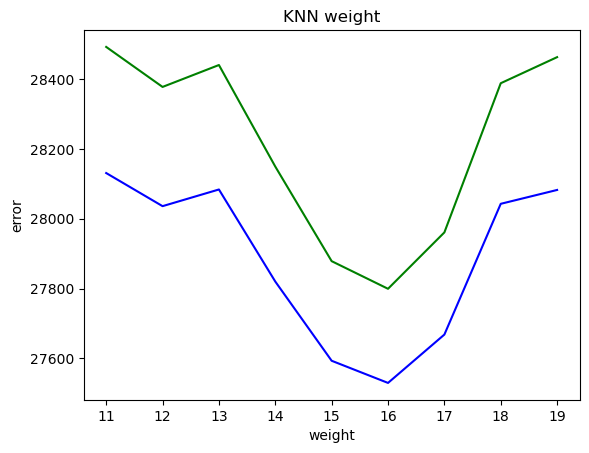

In [19]:
x_knn = []
y_knn_1 = []
y_knn_2 = []
for i in range(11,20):
        x_knn.append(i)
        pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', KNeighborsRegressor(n_neighbors=i,weights='uniform'))])
        pipeline_knn.fit(X_train, y_train)
        y_pred_knn = pipeline_knn.predict(X_val)
        score = rmse(y_val, y_pred_knn)
        y_knn_1.append(score)

for i in range(11,20):
        pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                                ('regressor', KNeighborsRegressor(n_neighbors=i,weights='distance'))])
        pipeline_knn.fit(X_train, y_train)
        y_pred_knn = pipeline_knn.predict(X_val)
        score = rmse(y_val, y_pred_knn)
        y_knn_2.append(score)
plt.plot(x_knn, y_knn_1,'-g',x_knn, y_knn_2,'-b')
plt.xlabel('weight')
plt.ylabel('error')
plt.title('KNN weight')
plt.show()

#### Type of distance in KNN

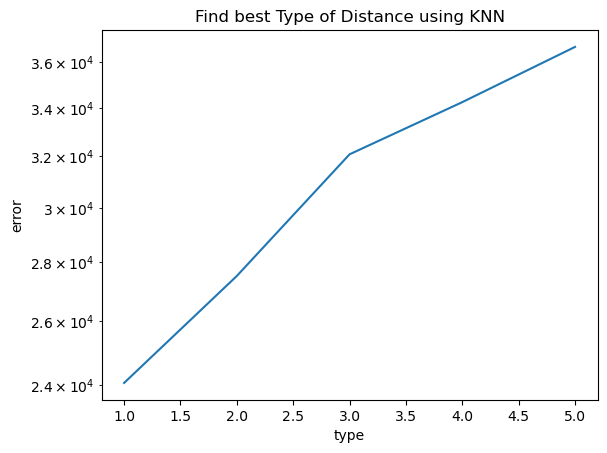

In [20]:
x_knn = []
y_knn = []
for i in range(1, 6):
    x_knn.append(i)
    pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=16,weights='distance',p=i))])
    pipeline_knn.fit(X_train, y_train)
    y_pred_knn = pipeline_knn.predict(X_val)
    score = rmse(y_val, y_pred_knn)
    y_knn.append(score)

plt.semilogy(x_knn, y_knn)
plt.xlabel('type')
plt.ylabel('error')
plt.title('Find best Type of Distance using KNN')
plt.show()

#### Training alpha in Ridge Regression

best alpha =  777


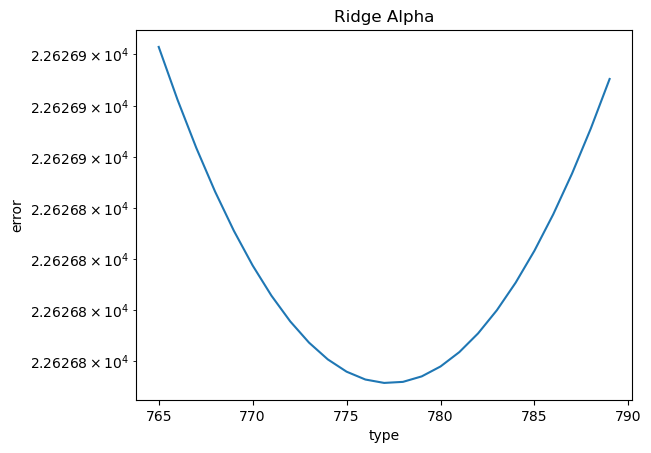

In [21]:
x_knn = []
y_knn = []
best_alpha = 1
best_error = 30000
for i in range(765, 790):
    x_knn.append(i)
    pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', Ridge(alpha=i))])
    pipeline_knn.fit(X_train, y_train)
    y_pred_knn = pipeline_knn.predict(X_val)
    score = rmse(y_val, y_pred_knn)
    y_knn.append(score)
    if score<best_error:
        best_alpha = i
        best_error = score
print("best alpha = ",best_alpha)
plt.semilogy(x_knn, y_knn)
plt.xlabel('type')
plt.ylabel('error')
plt.title('Ridge Alpha')
plt.show()


#### Training Random Forest

In [22]:
best_estimator = 10
best_depth = 40
best_feature = 20
best_error = 30000
for i in range(10,20):
    for j in range(40,50):
        for k in range(20,50):
            pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                                    ('regressor', RandomForestRegressor(n_estimators=i,max_depth=j,max_features=k,))])
            pipeline_rf.fit(X_train, y_train)
            y_pred_rf = pipeline_rf.predict(X_val)
            score = rmse(y_val, y_pred_rf)
            if score<best_error:
                best_estimator = i
                best_depth = j
                best_feature = k
                best_error = score

print("n_estimators = ",best_estimator)
print("max_depth = ",best_depth)
print("max_feature = ",best_feature)
print("best_score = ",best_error)

n_estimators =  18
max_depth =  45
max_feature =  26
best_score =  17827.22781713765


### Traning and Testing

#### Before training

In [23]:
# Define a pipeline combining preprocessing and model training
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor(n_neighbors=16,weights='distance',p=1))])

pipeline_ri = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge(alpha=777))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=best_estimator,max_depth=best_depth,max_features=best_feature))])

In [24]:
# Train Linear Regression model
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_val)
score = rmse(y_val, y_pred_lr)
print("{}: {:.6f}".format('LinearRegression',score))

# Train KNN Regressor model
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_val)
score = rmse(y_val, y_pred_knn)
print("{}: {:.6f}".format('KNN',score))

# Train Ridge Regression model
pipeline_ri.fit(X_train, y_train)
y_pred_ri = pipeline_ri.predict(X_val)
score = rmse(y_val, y_pred_ri)
print("{}: {:.6f}".format('Ridge Regression',score))

# Train RandomForestRegressor model
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_val)
score = rmse(y_val, y_pred_rf)
print("{}: {:.6f}".format('RandomForest',score))

LinearRegression: 23837.212226
KNN: 24068.826611
Ridge Regression: 22626.771617
RandomForest: 22386.831837


#### After training

In [25]:
# Define a pipeline combining preprocessing and model training
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

pipeline_knn = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', KNeighborsRegressor())])

pipeline_ri = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', Ridge())])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor())])
# Train Linear Regression model
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_val)
score = rmse(y_val, y_pred_lr)
print("{}: {:.6f}".format('LinearRegression',score))

# Train KNN Regressor model
pipeline_knn.fit(X_train, y_train)
y_pred_knn = pipeline_knn.predict(X_val)
score = rmse(y_val, y_pred_knn)
print("{}: {:.6f}".format('KNN',score))

# Train Ridge Regression model
pipeline_ri.fit(X_train, y_train)
y_pred_ri = pipeline_ri.predict(X_val)
score = rmse(y_val, y_pred_ri)
print("{}: {:.6f}".format('Ridge Regression',score))

# Train RandomForestRegressor model
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_val)
score = rmse(y_val, y_pred_rf)
print("{}: {:.6f}".format('RandomForest',score))

LinearRegression: 23837.212226
KNN: 31916.597308
Ridge Regression: 23828.085679
RandomForest: 22172.916478


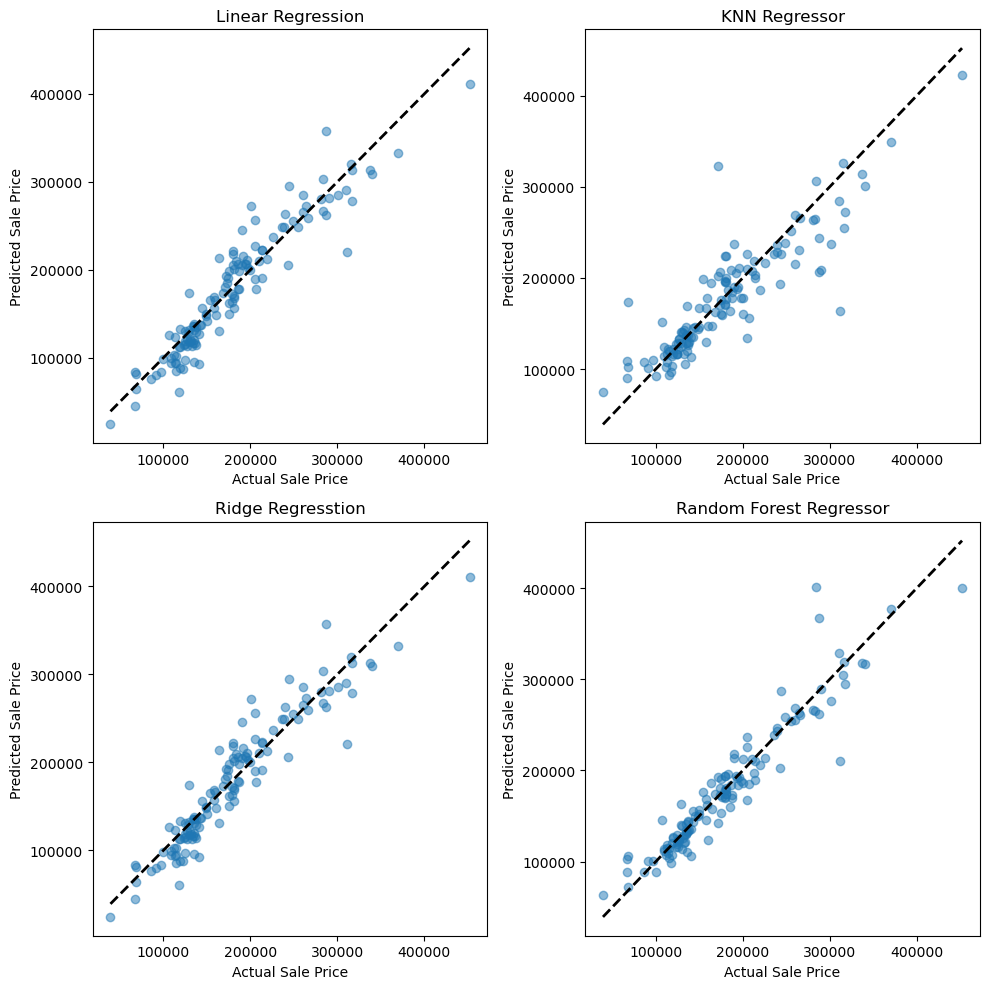

In [26]:
import matplotlib.pyplot as plt

# Optionally, you can plot the predicted vs actual values for visual evaluation
plt.figure(figsize=(10, 10))

# Plot for Linear Regression
plt.subplot(2, 2, 1)
plt.scatter(y_val, y_pred_lr, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear Regression')

# KNN Regressor
plt.subplot(2, 2, 2)
plt.scatter(y_val, y_pred_knn, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('KNN Regressor')

# Ridge Regresstion
plt.subplot(2, 2, 3)
plt.scatter(y_val, y_pred_ri, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Ridge Regresstion')

# RandomForestRegressor
plt.subplot(2,2,4)
plt.scatter(y_val, y_pred_rf, alpha=0.5)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Random Forest Regressor')
plt.tight_layout()
plt.show()


## Output result

In [27]:
y_test_rf = pipeline_rf.predict(test)
y_test_ri = pipeline_ri.predict(test)
y_pred_test = 0.5*y_test_rf+0.5*y_test_ri
predictions_df = pd.DataFrame({'Id': test_data.index+1461, 'SalePrice': y_pred_test})
predictions_df.to_csv('predictions.csv', index=False)